In [6]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, Dataset


In [37]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.MNIST(root='/home/student/Desktop/220962404/lab4/data',
                                       train=True, download=False, transform=transform)
testset = torchvision.datasets.MNIST(root='/home/student/Desktop/220962404/lab4/data',
                                     train=False, download=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64,  shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

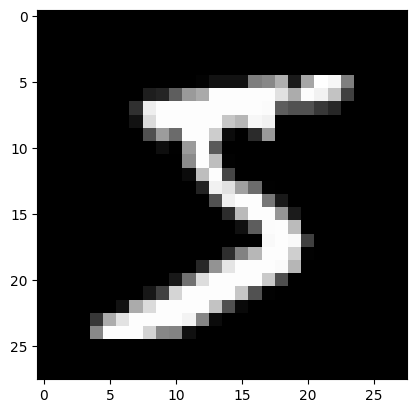

In [38]:
image, label = trainset[0]
image = image*0.5 + 0.5

plt.imshow(image.squeeze(), cmap="gray")
plt.show()

In [40]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2),
                                 nn.Conv2d(64, 128, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2),
                                 nn.Conv2d(128, 64, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2)
        )
        self.classification_head = nn.Sequential(nn.Linear(64, 20, bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True)
        )
        
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.size(0),-1))  


In [48]:
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 0.3014, Accuracy: 90.43%
Epoch [2/5], Loss: 0.0856, Accuracy: 97.42%
Epoch [3/5], Loss: 0.0622, Accuracy: 98.11%
Epoch [4/5], Loss: 0.0498, Accuracy: 98.46%
Epoch [5/5], Loss: 0.0431, Accuracy: 98.66%


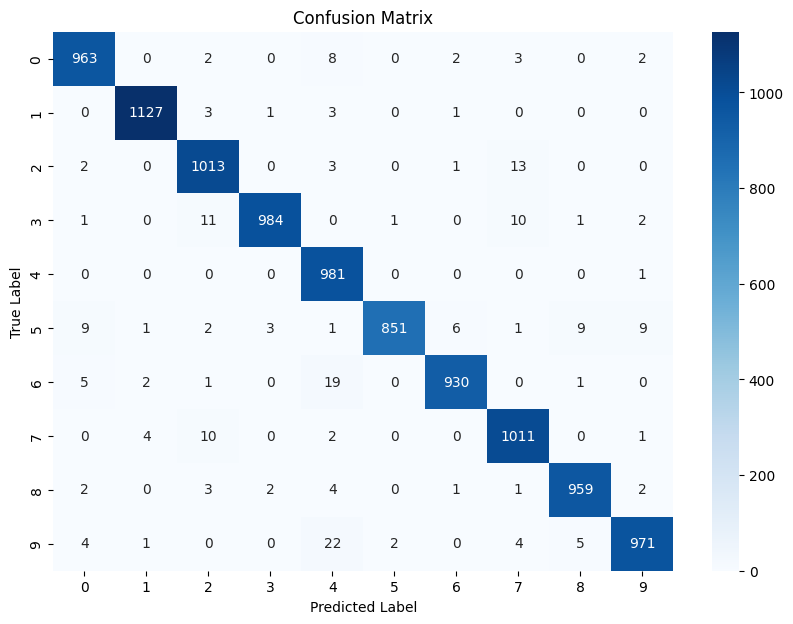

In [49]:
model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")


Total number of learnable parameters: 149798


## Q4

In [43]:
class CNNClassifier2(nn.Module):
    def __init__(self):
        super(CNNClassifier2, self).__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2),
                                 nn.Conv2d(32, 64, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2),
                                 nn.Conv2d(64, 32, kernel_size=3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2), stride=2)
        )
        self.classification_head = nn.Sequential(nn.Linear(32, 20, bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True)
        )
        
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.size(0),-1))  


In [44]:
model = CNNClassifier2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 0.3583, Accuracy: 88.57%
Epoch [2/5], Loss: 0.1129, Accuracy: 96.65%
Epoch [3/5], Loss: 0.0797, Accuracy: 97.62%
Epoch [4/5], Loss: 0.0664, Accuracy: 97.98%
Epoch [5/5], Loss: 0.0552, Accuracy: 98.31%


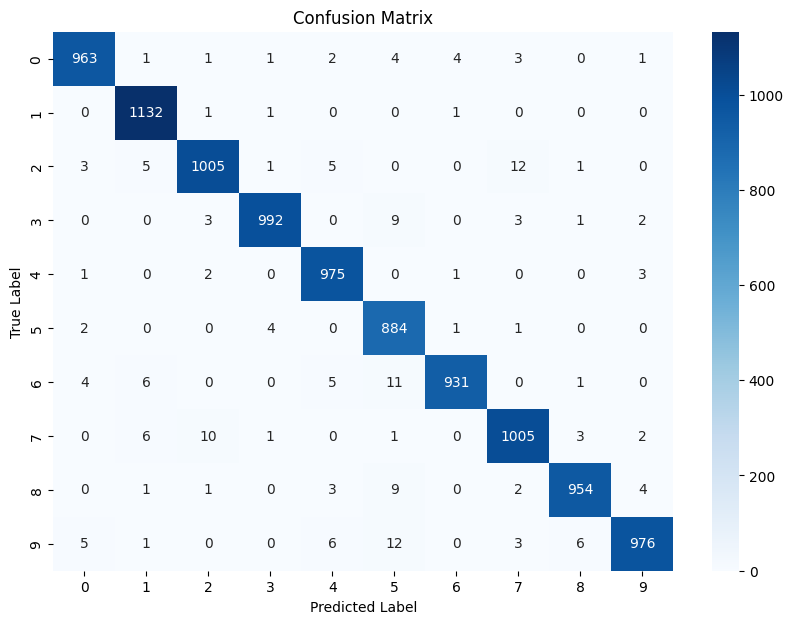

In [45]:
model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")


Total number of learnable parameters: 38150
